In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('titanic.csv')
# drop first column
valid_columns = ['Class', 'Sex', 'Age', 'Survived']
df = df[valid_columns]
df

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [13]:
df.isnull().sum()

Class       0
Sex         0
Age         0
Survived    0
dtype: int64

In [14]:
# change survived column to 0 or 1
df['Survived'] = df['Survived'].map({'No': 0, 'Yes': 1})
df

,Class,Sex,Age,Survived
0,3rd,Male,Child,0
1,3rd,Male,Child,0
2,3rd,Male,Child,0
3,3rd,Male,Child,0
4,3rd,Male,Child,0
...,...,...,...,...
2196,Crew,Female,Adult,1
2197,Crew,Female,Adult,1
2198,Crew,Female,Adult,1
2199,Crew,Female,Adult,1


In [16]:
df_encoded = pd.get_dummies(df)
df_encoded

,Survived,Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Female,Sex_Male,Age_Adult,Age_Child
0,0,False,False,True,False,False,True,False,True
1,0,False,False,True,False,False,True,False,True
2,0,False,False,True,False,False,True,False,True
3,0,False,False,True,False,False,True,False,True
4,0,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
2196,1,False,False,False,True,True,False,True,False
2197,1,False,False,False,True,True,False,True,False
2198,1,False,False,False,True,True,False,True,False
2199,1,False,False,False,True,True,False,True,False


In [24]:
# apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)
frequent_itemsets

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.323035,(Survived)
1,0.14766,(Class_1st)
2,0.129487,(Class_2nd)
3,0.320763,(Class_3rd)
4,0.40209,(Class_Crew)
...,...,...
70,0.006361,"(Sex_Female, Age_Child, Class_3rd, Survived)"
71,0.034075,"(Age_Adult, Sex_Male, Class_3rd, Survived)"
72,0.005906,"(Age_Child, Sex_Male, Class_3rd, Survived)"
73,0.009087,"(Age_Adult, Class_Crew, Sex_Female, Survived)"


In [25]:
# association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Survived),(Age_Adult),0.323035,0.950477,0.297138,0.919831,0.967757,-0.009900,0.617734,-0.046906
1,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493,0.037128
2,(Class_2nd),(Age_Adult),0.129487,0.950477,0.118582,0.915789,0.963505,-0.004492,0.588085,-0.041697
3,(Class_3rd),(Age_Adult),0.320763,0.950477,0.284871,0.888102,0.934375,-0.020008,0.442572,-0.093712
4,(Class_Crew),(Sex_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621,0.322047
5,(Class_Crew),(Age_Adult),0.402090,0.950477,0.402090,1.000000,1.052103,0.019913,inf,0.082827
6,(Sex_Female),(Age_Adult),0.213539,0.950477,0.193094,0.904255,0.951370,-0.009870,0.517240,-0.061028
7,(Sex_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441,0.061028
8,"(Class_1st, Sex_Female)",(Survived),0.065879,0.323035,0.064062,0.972414,3.010243,0.042781,24.539982,0.714898
9,"(Class_1st, Survived)",(Age_Adult),0.092231,0.950477,0.089505,0.970443,1.021007,0.001842,1.675526,0.022665


In [27]:
rules = rules.sort_values(by="confidence", ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,"(Class_Crew, Survived)",(Age_Adult),0.096320,0.950477,0.096320,1.000000,1.052103,0.004770,inf,0.054801
42,"(Class_Crew, Sex_Male, Survived)",(Age_Adult),0.087233,0.950477,0.087233,1.000000,1.052103,0.004320,inf,0.054256
5,(Class_Crew),(Age_Adult),0.402090,0.950477,0.402090,1.000000,1.052103,0.019913,inf,0.082827
24,"(Class_Crew, Sex_Female)",(Age_Adult),0.010450,0.950477,0.010450,1.000000,1.052103,0.000518,inf,0.050046
39,"(Class_Crew, Sex_Female, Survived)",(Age_Adult),0.009087,0.950477,0.009087,1.000000,1.052103,0.000450,inf,0.049977
11,"(Class_2nd, Age_Child)",(Survived),0.010904,0.323035,0.010904,1.000000,3.095640,0.007382,inf,0.684428
35,"(Class_2nd, Age_Child, Sex_Female)",(Survived),0.005906,0.323035,0.005906,1.000000,3.095640,0.003998,inf,0.680987
26,"(Class_Crew, Sex_Male)",(Age_Adult),0.391640,0.950477,0.391640,1.000000,1.052103,0.019395,inf,0.081404
18,"(Class_1st, Sex_Female)",(Age_Adult),0.065879,0.950477,0.065425,0.993103,1.044847,0.002808,7.180827,0.045950
28,"(Class_1st, Sex_Female, Survived)",(Age_Adult),0.064062,0.950477,0.063607,0.992908,1.044642,0.002718,6.982735,0.045659


In [28]:
survival_rules = rules[(rules["consequents"].astype(str).str.contains("Survived"))]
survival_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,"(Class_2nd, Age_Child)",(Survived),0.010904,0.323035,0.010904,1.000000,3.095640,0.007382,inf,0.684428
35,"(Class_2nd, Age_Child, Sex_Female)",(Survived),0.005906,0.323035,0.005906,1.000000,3.095640,0.003998,inf,0.680987
8,"(Class_1st, Sex_Female)",(Survived),0.065879,0.323035,0.064062,0.972414,3.010243,0.042781,24.539982,0.714898
29,"(Class_1st, Sex_Female, Age_Adult)",(Survived),0.065425,0.323035,0.063607,0.972222,3.009650,0.042473,24.370741,0.714480
30,"(Class_1st, Sex_Female)","(Age_Adult, Survived)",0.065879,0.297138,0.063607,0.965517,3.249394,0.044032,20.383008,0.741071
10,"(Class_2nd, Sex_Female)",(Survived),0.048160,0.323035,0.042254,0.877358,2.715986,0.026696,5.519869,0.663777
13,"(Class_Crew, Sex_Female)",(Survived),0.010450,0.323035,0.009087,0.869565,2.691861,0.005711,5.190065,0.635147
38,"(Age_Adult, Class_Crew, Sex_Female)",(Survived),0.010450,0.323035,0.009087,0.869565,2.691861,0.005711,5.190065,0.635147
40,"(Class_Crew, Sex_Female)","(Age_Adult, Survived)",0.010450,0.297138,0.009087,0.869565,2.926473,0.005982,5.388611,0.665243
32,"(Age_Adult, Class_2nd, Sex_Female)",(Survived),0.042254,0.323035,0.036347,0.860215,2.662916,0.022698,4.842904,0.652022


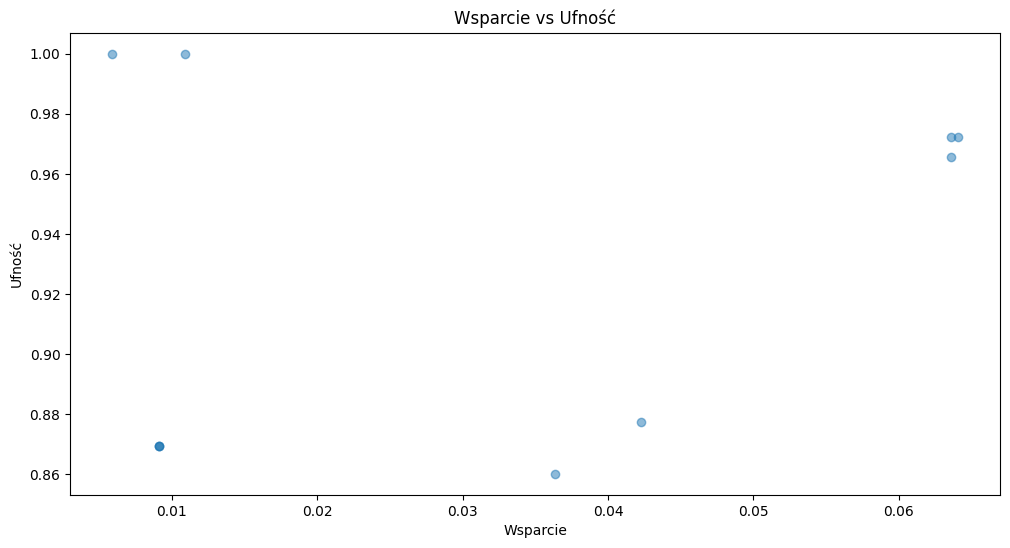

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(survival_rules["support"], survival_rules["confidence"], alpha=0.5)
plt.xlabel("Wsparcie")
plt.ylabel("Ufność")
plt.title("Wsparcie vs Ufność")
plt.show()

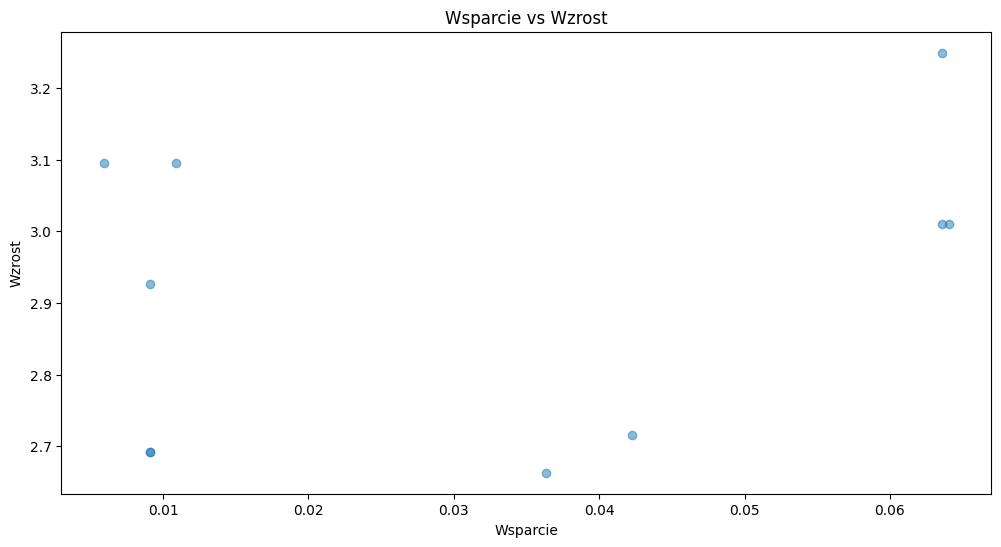

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(survival_rules["support"], survival_rules["lift"], alpha=0.5)
plt.xlabel("Wsparcie")
plt.ylabel("Wzrost")
plt.title("Wsparcie vs Wzrost")
plt.show()

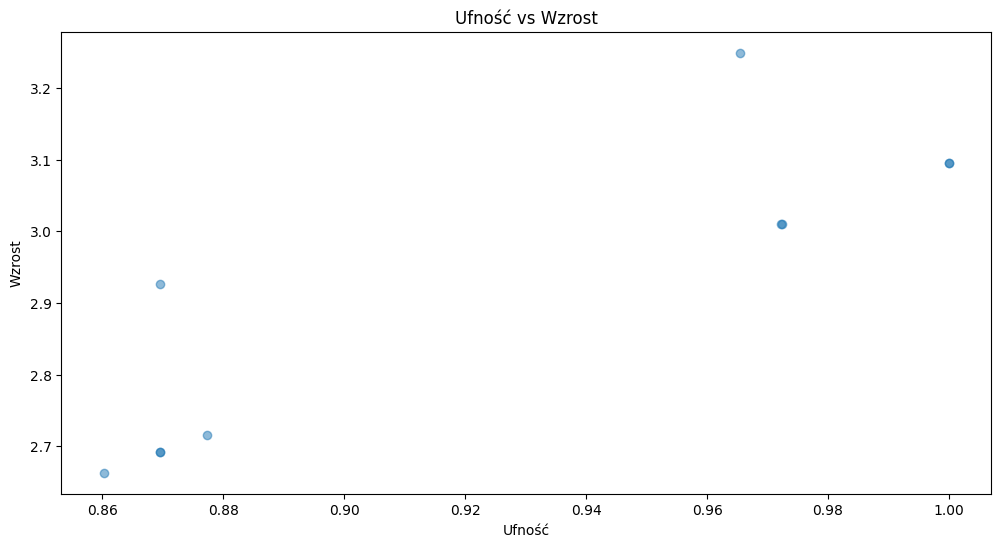

In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(survival_rules["confidence"], survival_rules["lift"], alpha=0.5)
plt.xlabel("Ufność")
plt.ylabel("Wzrost")
plt.title("Ufność vs Wzrost")
plt.show()

In [32]:
print(survival_rules.head())

                           antecedents            consequents  \
11              (Class_2nd, Age_Child)             (Survived)   
35  (Class_2nd, Age_Child, Sex_Female)             (Survived)   
8              (Class_1st, Sex_Female)             (Survived)   
29  (Class_1st, Sex_Female, Age_Adult)             (Survived)   
30             (Class_1st, Sex_Female)  (Age_Adult, Survived)   

    antecedent support  consequent support   support  confidence      lift  \
11            0.010904            0.323035  0.010904    1.000000  3.095640   
35            0.005906            0.323035  0.005906    1.000000  3.095640   
8             0.065879            0.323035  0.064062    0.972414  3.010243   
29            0.065425            0.323035  0.063607    0.972222  3.009650   
30            0.065879            0.297138  0.063607    0.965517  3.249394   

    leverage  conviction  zhangs_metric  
11  0.007382         inf       0.684428  
35  0.003998         inf       0.680987  
8   0.042781  

In [33]:
for index, rule in survival_rules.head().iterrows():
    antecedents = ", ".join(list(rule["antecedents"]))
    consequents = ", ".join(list(rule["consequents"]))
    print(
        f"Jeśli {antecedents}, to {consequents} (wsparcie: {rule['support']:.3f}, ufność: {rule['confidence']:.3f}, wzrost: {rule['lift']:.3f})"
    )

Jeśli Class_2nd, Age_Child, to Survived (wsparcie: 0.011, ufność: 1.000, wzrost: 3.096)
Jeśli Class_2nd, Age_Child, Sex_Female, to Survived (wsparcie: 0.006, ufność: 1.000, wzrost: 3.096)
Jeśli Class_1st, Sex_Female, to Survived (wsparcie: 0.064, ufność: 0.972, wzrost: 3.010)
Jeśli Class_1st, Sex_Female, Age_Adult, to Survived (wsparcie: 0.064, ufność: 0.972, wzrost: 3.010)
Jeśli Class_1st, Sex_Female, to Age_Adult, Survived (wsparcie: 0.064, ufność: 0.966, wzrost: 3.249)
